##Assignment 2.1 - Time-series Prediction    

In this file, we work on the time-series prediction using non-linear autoregressive model (NAR).

Specifically, we will conduct prediction on Climate Change dataset. The method is implemented with a ``python`` package named ``Skforecast``.


In [1]:
# Please first load your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Please go to the folder with all assignment files
# Please change the following path to your own path
!cd /content/drive/MyDrive/DataMiningAndNeuralNetworks/

We implement the prediction method with a python package named ``Skforecast``, which is a simple library that contains the classes and functions necessary to adapt any ``scikit-learn`` regression model to forecasting problems.

We need to install the ``Skforecast`` with the following command.

In [3]:
!pip install skforecast

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.8/424.8 kB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.6/409.6 kB 16.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.4/233.4 kB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 10.1 MB/s eta 0:00:00


# Climate Change Forecast
In this section, we will conduct time-series prediction on the climate change dataset.

Please first download the data csv file from [here](https://drive.google.com/file/d/1q3D4h8XF6sqD1BgP9M9Yl0XPT9B7FvRy/view?usp=sharing), and put it into your working directory.

In [76]:
import numpy as np
import pandas as pd

# Load the global land temperature dataset
drive.mount('/content/drive')
df = pd.read_csv("/content/drive/MyDrive/DataMiningAndNeuralNetworks/session2/GlobalLandTemperaturesByCity.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
# List the cities included in the datasets
# You can choose any city that you like
df['City'].unique()

# Check if your chosen city is included in the data
print('Rotterdam' in df['City'].unique())

True


In [215]:
# Data Cleaning
df = df.dropna() # Remove null values

selected_city = "Lyon" #"Rotterdam" or "Lyon"

df_shanghai = df[df.City == selected_city]

df_shanghai.index = pd.to_datetime(df_shanghai.dt)
df_shanghai.head()

len(df_shanghai) # Check the number of samples in the df_shanghai

3166

In [216]:
# Preserve only the average temperatures data
avg_tmp = df_shanghai['AverageTemperature']
print(avg_tmp)

dt
1743-11-01     4.858
1744-04-01     9.214
1744-05-01    11.357
1744-06-01    15.197
1744-07-01    17.145
               ...  
2013-04-01     8.755
2013-05-01    10.477
2013-06-01    15.970
2013-07-01    20.531
2013-08-01    18.633
Name: AverageTemperature, Length: 3166, dtype: float64


## Visualize the dataset
Here we partition the dataset into training, validation and test sets. Note that test set is of 20% of the whole dataset, training is (80% $\times$ 80%) of the original dataset and validation is (80% $\times$ 20%) of the dataset.

In [217]:
# We choose the first 80% of the dataset as (training set + validation set)
# The rest of 20% as test set
import math

data_size = len(avg_tmp)
train_set = avg_tmp[:math.floor(data_size * 0.8*0.8)]
val_set = avg_tmp[math.floor(data_size * 0.8*0.8):math.floor(data_size * 0.8)]
test_set = avg_tmp[math.floor(data_size * 0.8):]

Text(0.5, 1.0, 'Average Temperature of Lyon from 1841 to 2013')

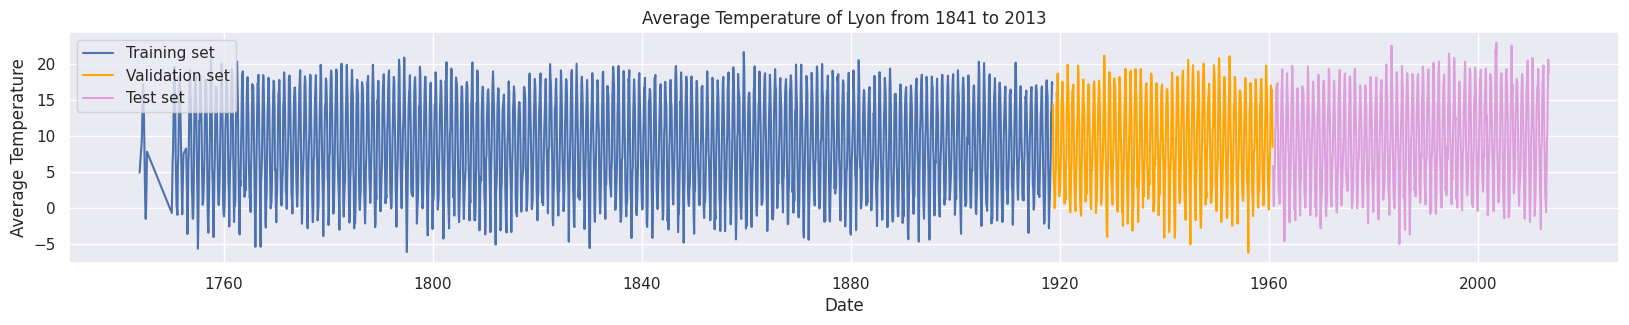

In [218]:
import matplotlib.pyplot as plt
# Import seaborn
import seaborn as sns

# Apply the default theme
sns.set_theme()

plt.rcParams["figure.dpi"]=100
plt.rcParams['savefig.dpi']=300

plt.figure(figsize=(20,3))
fig = plt.figure(1)
ax = fig.add_subplot(111) # 111: No. of rows, cols, index
ax.set_xlabel("Date")
ax.set_ylabel("Average Temperature")
ax.plot(train_set, label="Training set")
ax.plot(val_set, label="Validation set", c="orange")
ax.plot(test_set, label="Test set", c="plum")
ax.legend()
plt.title(f"Average Temperature of {selected_city} from 1841 to 2013")

# plt.savefig("./global_temp_shanghai.jpg", bbox_inches='tight') # save figure

## Train Non-linear Autoregressive Model
Now, we start to train a non-linear autoregressive (NAR) model on the training set and choosing the hyper-parameters on the validation set.

If you choose support vector regressor as the regression model, then in addtion to tune on ``lags``, you need to tune on ``kernel``, ``gamma``, etc.
If you choose random forest, you mainly need to tune on ``lags``.
You can also choose other machine learning regression method for the autoregressive model.

After deciding the hyper-parameters, you can predict the results on the test set.

We will utilize package ``skforecast`` for implementation.

In [219]:
# Modeling and Forecasting
# First import the necessary sklearn regression method
from sklearn.neural_network import MLPRegressor # we use neural network as regressor
from sklearn.metrics import mean_squared_error

# We import the prediction functions from skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg

forecaster = ForecasterAutoreg(
    regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='tanh', max_iter=500), # you can tune the hidden dimension and other hyper-parameters here
    lags = 10 # you can tune the lags here
    )

# fit model on the training set
forecaster.fit(y=train_set)
# print the NAR model
forecaster

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


ForecasterAutoreg 
Regressor: MLPRegressor(activation='tanh', hidden_layer_sizes=(50,), max_iter=500) 
Lags: [ 1  2  3  4  5  6  7  8  9 10] 
Transformer for y: None 
Transformer for exog: None 
Window size: 10 
Weight function included: False 
Differentiation order: None 
Exogenous included: False 
Type of exogenous variable: None 
Exogenous variables names: None 
Training range: [0, 2025] 
Training index type: RangeIndex 
Training index frequency: 1 
Regressor parameters: {'activation': 'tanh', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 500, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False} 
fit_kwargs: {} 
Creation date: 2023-1

After fitting/training the model on the training set, we evaluate the results on the validation set.

In [220]:
steps = len(val_set)
predictions = forecaster.predict(steps=steps)
predictions.head(5)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


10    13.819667
11     8.659489
12     3.739739
13     0.042393
14    -1.569171
Name: pred, dtype: float64

In [221]:
# compute the root mean squared error between the predictions and validation set
mse = mean_squared_error(val_set, predictions)
print("The MSE on the validation set is: {:.3f}".format(mse))

The MSE on the validation set is: 2.567


We now visualize the prediction results and the ground-truth validation data.

Text(0.5, 1.0, 'Prediction results on validation of Lyon dataset')

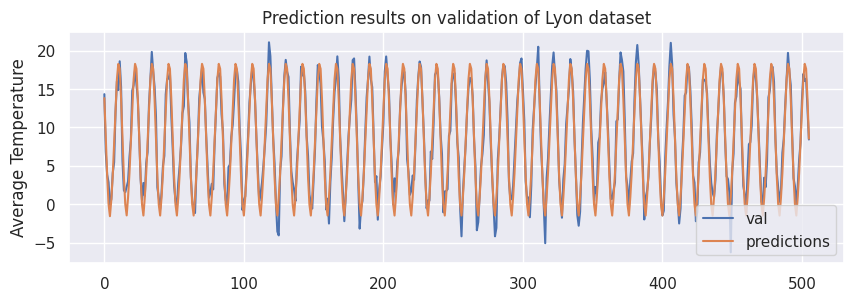

In [222]:
# Plot
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(val_set.to_numpy(), label='val')
ax.plot(predictions.to_numpy(), label='predictions')
ax.legend()
ax.set_ylabel("Average Temperature")
plt.title(f"Prediction results on validation of {selected_city} dataset")

## Tune the hyper-parameter ``lags``
We first try a large range of lags as follows:

In [115]:
lag_list = np.arange(2,50,2)
mse_list = []
for i in range(len(lag_list)):
    # Set regressor
    forecaster = ForecasterAutoreg(
        regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='tanh', max_iter=500, learning_rate='constant'), # you can tune the hidden dimension and other hyper-parameters here
        lags = int(lag_list[i]) # you can try different lags here
    )

    # Trainig on training set
    forecaster.fit(y=train_set)

    # Evaluate model on validation set
    steps = len(val_set)
    predictions = forecaster.predict(steps=steps)

    # Compute MSE between predictions and ground-truth data

    mse = mean_squared_error(val_set, predictions)
    mse_list.append(mse)
    print("The MSE on the validation set is: {:.3f}".format(mse))

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 59.805


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 43.559


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 16.410


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.223


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.227


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.100


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.075


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.177


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.454


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.143


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.167


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.586


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.265


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.289


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.308


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.351


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.402


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.659


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.832


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.586


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.503


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.337


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 3.064
The MSE on the validation set is: 3.907


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


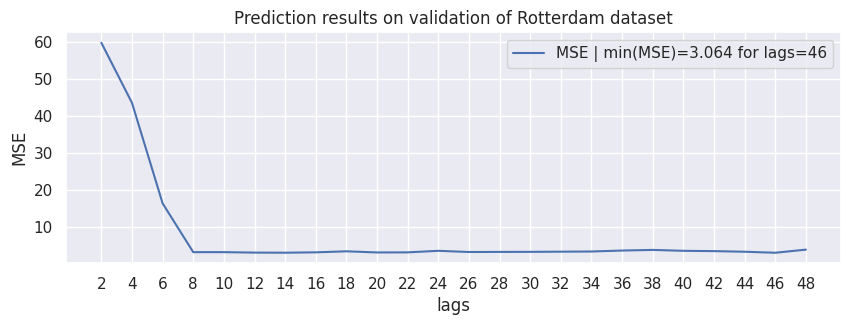

In [116]:
# Plot the MSE_list curve to select the best lags
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mse_list)
# ax.legend()

min_mse = np.min(mse_list)
min_lags = lag_list[np.argmin(mse_list)]

ax.legend([f'MSE | min(MSE)={min_mse:.3f} for lags={min_lags}'])

ax.set_xlabel("lags")
ax.set_ylabel("MSE")
plt.title(f"Prediction results on validation of {selected_city} dataset")
plt.xticks(np.arange(len(lag_list)),np.arange(2,50,2));

We now try a smaller range of lags that gives the lowest MSE.

1.   Élément de liste
2.   Élément de liste



In [230]:
# We change to a smaller range of lags
lag_list = np.arange(2,10,1)
mse_list = []
model_list = []
for i in range(len(lag_list)):
    # Set regressor
    forecaster = ForecasterAutoreg(
        regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='tanh', max_iter=500, learning_rate = 'constant'),
        lags = int(lag_list[i]) # you can try different lags here
    )

    # Trainig on training set
    forecaster.fit(y=train_set)

    # Evaluate model on validation set
    steps = len(val_set)
    predictions = forecaster.predict(steps=steps)

    # Compute MSE between predictions and ground-truth data

    mse = mean_squared_error(val_set, predictions)
    mse_list.append(mse)
    print("The MSE on the validation set is: {:.3f}".format(mse))
    model_list.append(forecaster)

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 20.262


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 14.118


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 2.724


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 2.689


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 2.559


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 2.626


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE on the validation set is: 2.603
The MSE on the validation set is: 2.560


/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:805: UserWarning: `y` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


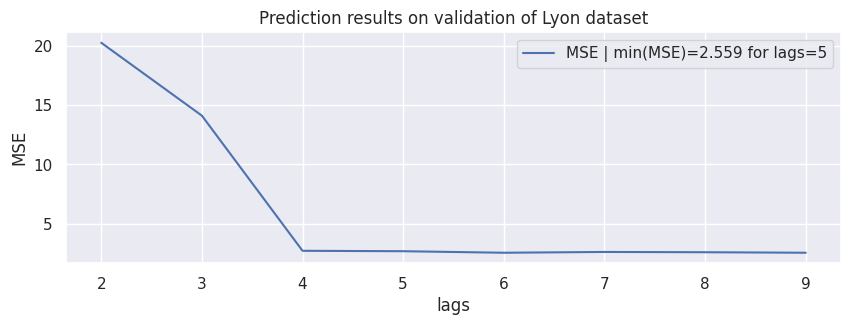

In [231]:
# Plot the MSE_list curve to select the best lags
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(mse_list)

min_mse = np.min(mse_list)
min_lags = np.argmin(mse_list) + 1  # Adding 1 to align with lags starting from 1


ax.legend([f'MSE | min(MSE)={min_mse:.3f} for lags={min_lags}'])


ax.set_xlabel("lags")
ax.set_ylabel("MSE")
plt.title(f"Prediction results on validation of {selected_city} dataset")
plt.xticks(np.arange(8),np.arange(2,10,1));

In [235]:
# Seems that lag=5 gives good prediction results
# Hence, we try lag=5
lag=5
# forecaster = ForecasterAutoreg(
#         regressor = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', max_iter=500),
#         lags =lag
#     )

# Trainig on training set
# forecaster.fit(y=train_set)

forecaster = model_list[lag - 2]

In [236]:
# Evaluate model on test set
steps = len(val_set) + len(test_set)
predictions = forecaster.predict(steps=steps)[len(val_set):]

# Compute MSE between predictions and ground-truth data
mse = mean_squared_error(test_set, predictions)
print("The MSE of prediction results on the test set is: {:.3f}\n".format(mse))

/usr/local/lib/python3.10/dist-packages/skforecast/utils/utils.py:867: UserWarning: `last_window` has DatetimeIndex index but no frequency. Index is overwritten with a RangeIndex of step 1.
  warnings.warn(


The MSE of prediction results on the test set is: 3.307



Text(0.5, 1.0, 'Prediction results on test set of Lyon dataset (lags=5)')

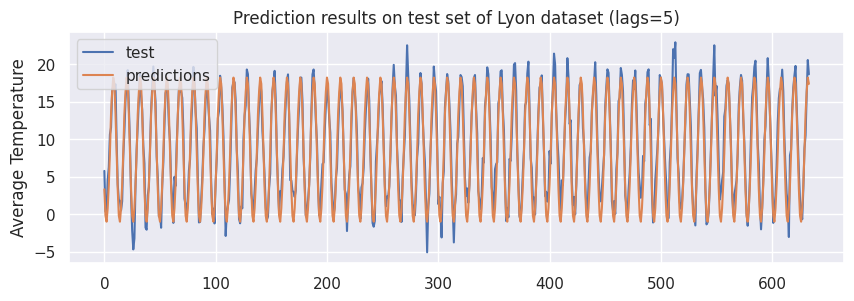

In [237]:
# Plot the prediction results on the test set
fig, ax = plt.subplots(figsize=(10, 3))
ax.plot(test_set.to_numpy(), label='test')
ax.plot(predictions.to_numpy(), label='predictions')
ax.legend()
ax.set_ylabel("Average Temperature")
plt.title(f"Prediction results on test set of {selected_city} dataset (lags={lag})")